In [28]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
df_train = pd.read_csv('/Users/bhsrinivasan/Documents/IDS/a14-data/train.csv')
df_test = pd.read_csv('/Users/bhsrinivasan/Documents/IDS/a14-data/test.csv')
df_train.head(5)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [52]:
#ID     - Needs to be removed. Just for the indexing purpose it is used

# Below are the features
#========================
#Gender - Categorical Data -Nominal
#Age    - Continuous Numerical Data
#Driving_License - Binomial Data (0,1)
#Region_code - Categorical Data -Nominal
#Previously_Insured - Binomial Data (0,1)
#Vehicle_Age - Categorical Data - ordinal
#Vehicle_Damage - Binomial Data (yes,No)
#Annual_Premium - Continuous and ratio data
#Policy_Sales_Channel -
#Vintage -
#
#Predicted class
#===============
#Response -Binomial Data (0,1) ------> This is the class label (class 0 , class 1)

In [29]:
df_train.info()
df_train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


(381109, 12)

In [53]:
type_counts0 = df_train['Gender'].value_counts()
type_counts1 = df_train['Region_Code'].value_counts()
type_counts2 = df_train['Driving_License'].value_counts()
type_counts3 = df_train['Annual_Premium'].value_counts()
type_counts4 = df_train['Vehicle_Age'].value_counts()
type_counts5 = df_train['Policy_Sales_Channel'].value_counts()
type_counts6 = df_train['Vintage'].value_counts()
type_counts7 = df_train['Response'].value_counts()
type_counts0

Male      206089
Female    175020
Name: Gender, dtype: int64

In [54]:
type_counts2

1    380297
0       812
Name: Driving_License, dtype: int64

In [32]:
type_counts1

28.0    106415
8.0      33877
46.0     19749
41.0     18263
15.0     13308
30.0     12191
29.0     11065
50.0     10243
3.0       9251
11.0      9232
36.0      8797
33.0      7654
47.0      7436
35.0      6942
6.0       6280
45.0      5605
37.0      5501
18.0      5153
48.0      4681
14.0      4678
39.0      4644
10.0      4374
21.0      4266
2.0       4038
13.0      4036
7.0       3279
12.0      3198
9.0       3101
27.0      2823
32.0      2787
43.0      2639
17.0      2617
26.0      2587
25.0      2503
24.0      2415
38.0      2026
0.0       2021
16.0      2007
31.0      1960
23.0      1960
20.0      1935
49.0      1832
4.0       1801
34.0      1664
19.0      1535
22.0      1309
40.0      1295
5.0       1279
1.0       1008
44.0       808
42.0       591
52.0       267
51.0       183
Name: Region_Code, dtype: int64

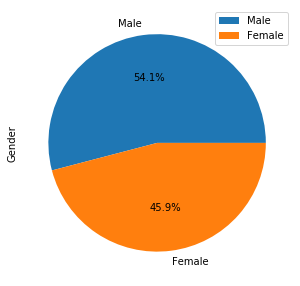

In [33]:
df2 = pd.DataFrame({'Gender': type_counts0}, 
                     index = ['Male', 'Female']
                   )
df2.plot.pie(y='Gender', figsize=(5,5), autopct='%1.1f%%')

In [55]:
type_counts3

2630.0     64877
69856.0      140
39008.0       41
38287.0       38
45179.0       38
           ...  
62326.0        1
59733.0        1
55934.0        1
75387.0        1
53346.0        1
Name: Annual_Premium, Length: 48838, dtype: int64

In [40]:
df_test.head(5)

(127037, 11)

In [41]:
df_test.shape

(127037, 11)

In [56]:
type_counts4

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64

In [49]:
type_counts5

256    1418
73     1410
282    1397
158    1394
187    1392
       ... 
205    1235
89     1234
32     1230
224    1227
277    1226
Name: Vintage, Length: 290, dtype: int64

In [51]:
type_counts6

0    334399
1     46710
Name: Response, dtype: int64